In [5]:
paths = [
"outputs/2023-10-18/11-44-08-805221",
# "outputs/2023-11-01/16-24-19-171848",
"outputs/2023-10-18/11-44-08-874258",
"outputs/2023-10-18/11-44-08-874396",
"outputs/2023-10-18/11-44-08-882528",
"outputs/2023-10-18/11-44-08-884445",
"outputs/2023-10-18/11-44-08-886024",
"outputs/2023-10-18/11-44-08-906468",
"outputs/2023-10-18/11-44-08-911000",
"outputs/2023-10-18/11-44-08-932201",
"outputs/2023-10-18/11-44-08-953521",
# "outputs/2023-11-12/19-20-15-010722",
"outputs/2023-11-13/12-05-39-054691",
"outputs/2023-11-14/10-27-23-673379"
]

In [6]:
import os
import yaml
from yaml import Loader
import glob

In [7]:
import pickle
import matplotlib.pyplot as plt
from probe import get_results
import os

In [8]:
import glob
exp_folders = {}
for path in paths:
    yaml_file = os.path.join(path, ".hydra", "overrides.yaml")
    # parse file
    with open(yaml_file, 'r') as stream:
        try:
            data = yaml.safe_load(stream)
            experiment = data[-1]
            experiment = experiment.split("=")[1]
            experiment = experiment.replace("dfa/", "")
            layer = data[4]
            layer = layer.split("=")[1]
            exp_folders[f"{experiment}/{layer}"] = path
            # ckpt = glob.glob(os.path.join(path, "finalexps2", "*/checkpoints/*.ckpt"))[0]
            # # escape equal sign
            # ckpt = ckpt.replace("=", "\\=")
            # overrides = " ".join(data)
            # print(f"export PYTHONHASHSEED=0; export CUDA_VISIBLE_DEVICES=2; python train.py train.ckpt=\"{ckpt}\" train.test=true {overrides} > newexps/{experiment}_{layer}.log 2> newexps/{experiment}_{layer}.err &")
        except yaml.YAMLError as exc:
            print(exc)

In [9]:
exp_folders

{'transformer/8': 'outputs/2023-10-18/11-44-08-805221',
 'transformer/2': 'outputs/2023-10-18/11-44-08-874258',
 'transformer/4': 'outputs/2023-10-18/11-44-08-874396',
 'transformer/1': 'outputs/2023-10-18/11-44-08-882528',
 'linear_transformer/4': 'outputs/2023-10-18/11-44-08-884445',
 'retnet/4': 'outputs/2023-10-18/11-44-08-886024',
 'rwkv/2': 'outputs/2023-10-18/11-44-08-906468',
 'h3/2': 'outputs/2023-10-18/11-44-08-911000',
 'hyena/2': 'outputs/2023-10-18/11-44-08-932201',
 'lstm/1': 'outputs/2023-10-18/11-44-08-953521',
 'transformer/12': 'outputs/2023-11-13/12-05-39-054691',
 'linear_transformer/8': 'outputs/2023-11-14/10-27-23-673379'}

## In-context learning curve of each model

In [18]:
def in_context_learning_curve(folder, title="null"):
    data = get_results(folder + "/generations/200_test.txt")
    accs = []
    for t in range(300):
        total = 0.0
        correct = 0.0
        for b in range(len(data)):
            labels = data[b]["char_labels"]
            if len(labels) > t:
                correct += labels[t]
                total += 1
        accs.append(correct / total)
    # plot accs
    # make high res
    if title in ("transformer/4", "transformer/2", "transformer/1"):
        return None
    title = title.split("/")[0]
    # make first letter uppercase
    title = title[0].upper() + title[1:]
    title = title.replace("_", " ")


    plt.plot(accs, label=title)
    # set x label
    plt.legend()


In [19]:
data1 = get_results(exp_folders["transformer/8"] + "/generations/200_test.txt")

In [20]:
data1[0].keys()

dict_keys(['input', 'target', 'pred', 'dfa', 'char_labels', 'probs', 'vocab', 'states', 'hidden_outputs'])

In [21]:
print(data1[0]["vocab"])

['.', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', '|']


In [22]:
print(data1[0]["input"])

ghaggnoaaghaoaanoaananoalbaoaoaahaanlb|ghoaoalbalbaagepoalbaahaoalbalbaaggebaaggna|ebalbaoaoalba|ghaghalbaan|ebalbaoalbalbaananoalbaoaoalbaanoaah|gbnagh|ebaoaoaoaoaoal|ebaoaoalbaoaahaanlbalbaoaoalbaoalba|ebaahaoalbaageplbaanoalbaaghalba|ebaaggebalbalbaoaanoaageenlbalbalbaaha|ghoaoaoaoaoalbalbalbalbaagepaggebaagepoaahaoaano


In [23]:
def write_dfa_data(data):
    for index, datum in enumerate(data):
        input = datum["input"]
        examples = input.split("|")
        vocab = sorted(list(set(list("".join(examples)))))
        inv_vocab = {v: i for i, v in enumerate(vocab)}
        with open(f"FlexFringe/data/icl_dfa_data/{index}.dat", "w") as handle:
            print(f"{len(examples)} {len(vocab)}", file=handle)
            for example in examples:
                encoded = [inv_vocab[c] for c in example]
                encoded_str = ' '.join([str(c) for c in encoded])
                print(f"1 {len(encoded)} {encoded_str}", file=handle)
        # print vocab information to another file with same index
        # with open(f"FlexFringe/data/icl_dfa_data/{index}_vocab.txt", "w") as handle:
        #     vocab_str = ' '.join(vocab)
        #     print(f"{vocab_str}", file=handle)

In [24]:
write_dfa_data(data1)

In [ ]:
data2 = get_results(exp_folders["h3/2"] + "/generations/200_test.txt")

In [ ]:
for d1, d2 in zip(data1, data2):
    assert d1["input"] == d2["input"]

In [25]:
# configure matplotlib to make high-quality conference style
rc = {
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "font.size": 10,
    "axes.labelsize": 12,
    "axes.titlesize": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "figure.figsize": [3.39, 2.10],
    "figure.dpi": 300,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}\usepackage{amssymb}",
}
# set rc
plt.rcParams.update(rc)


skipping lstm/1


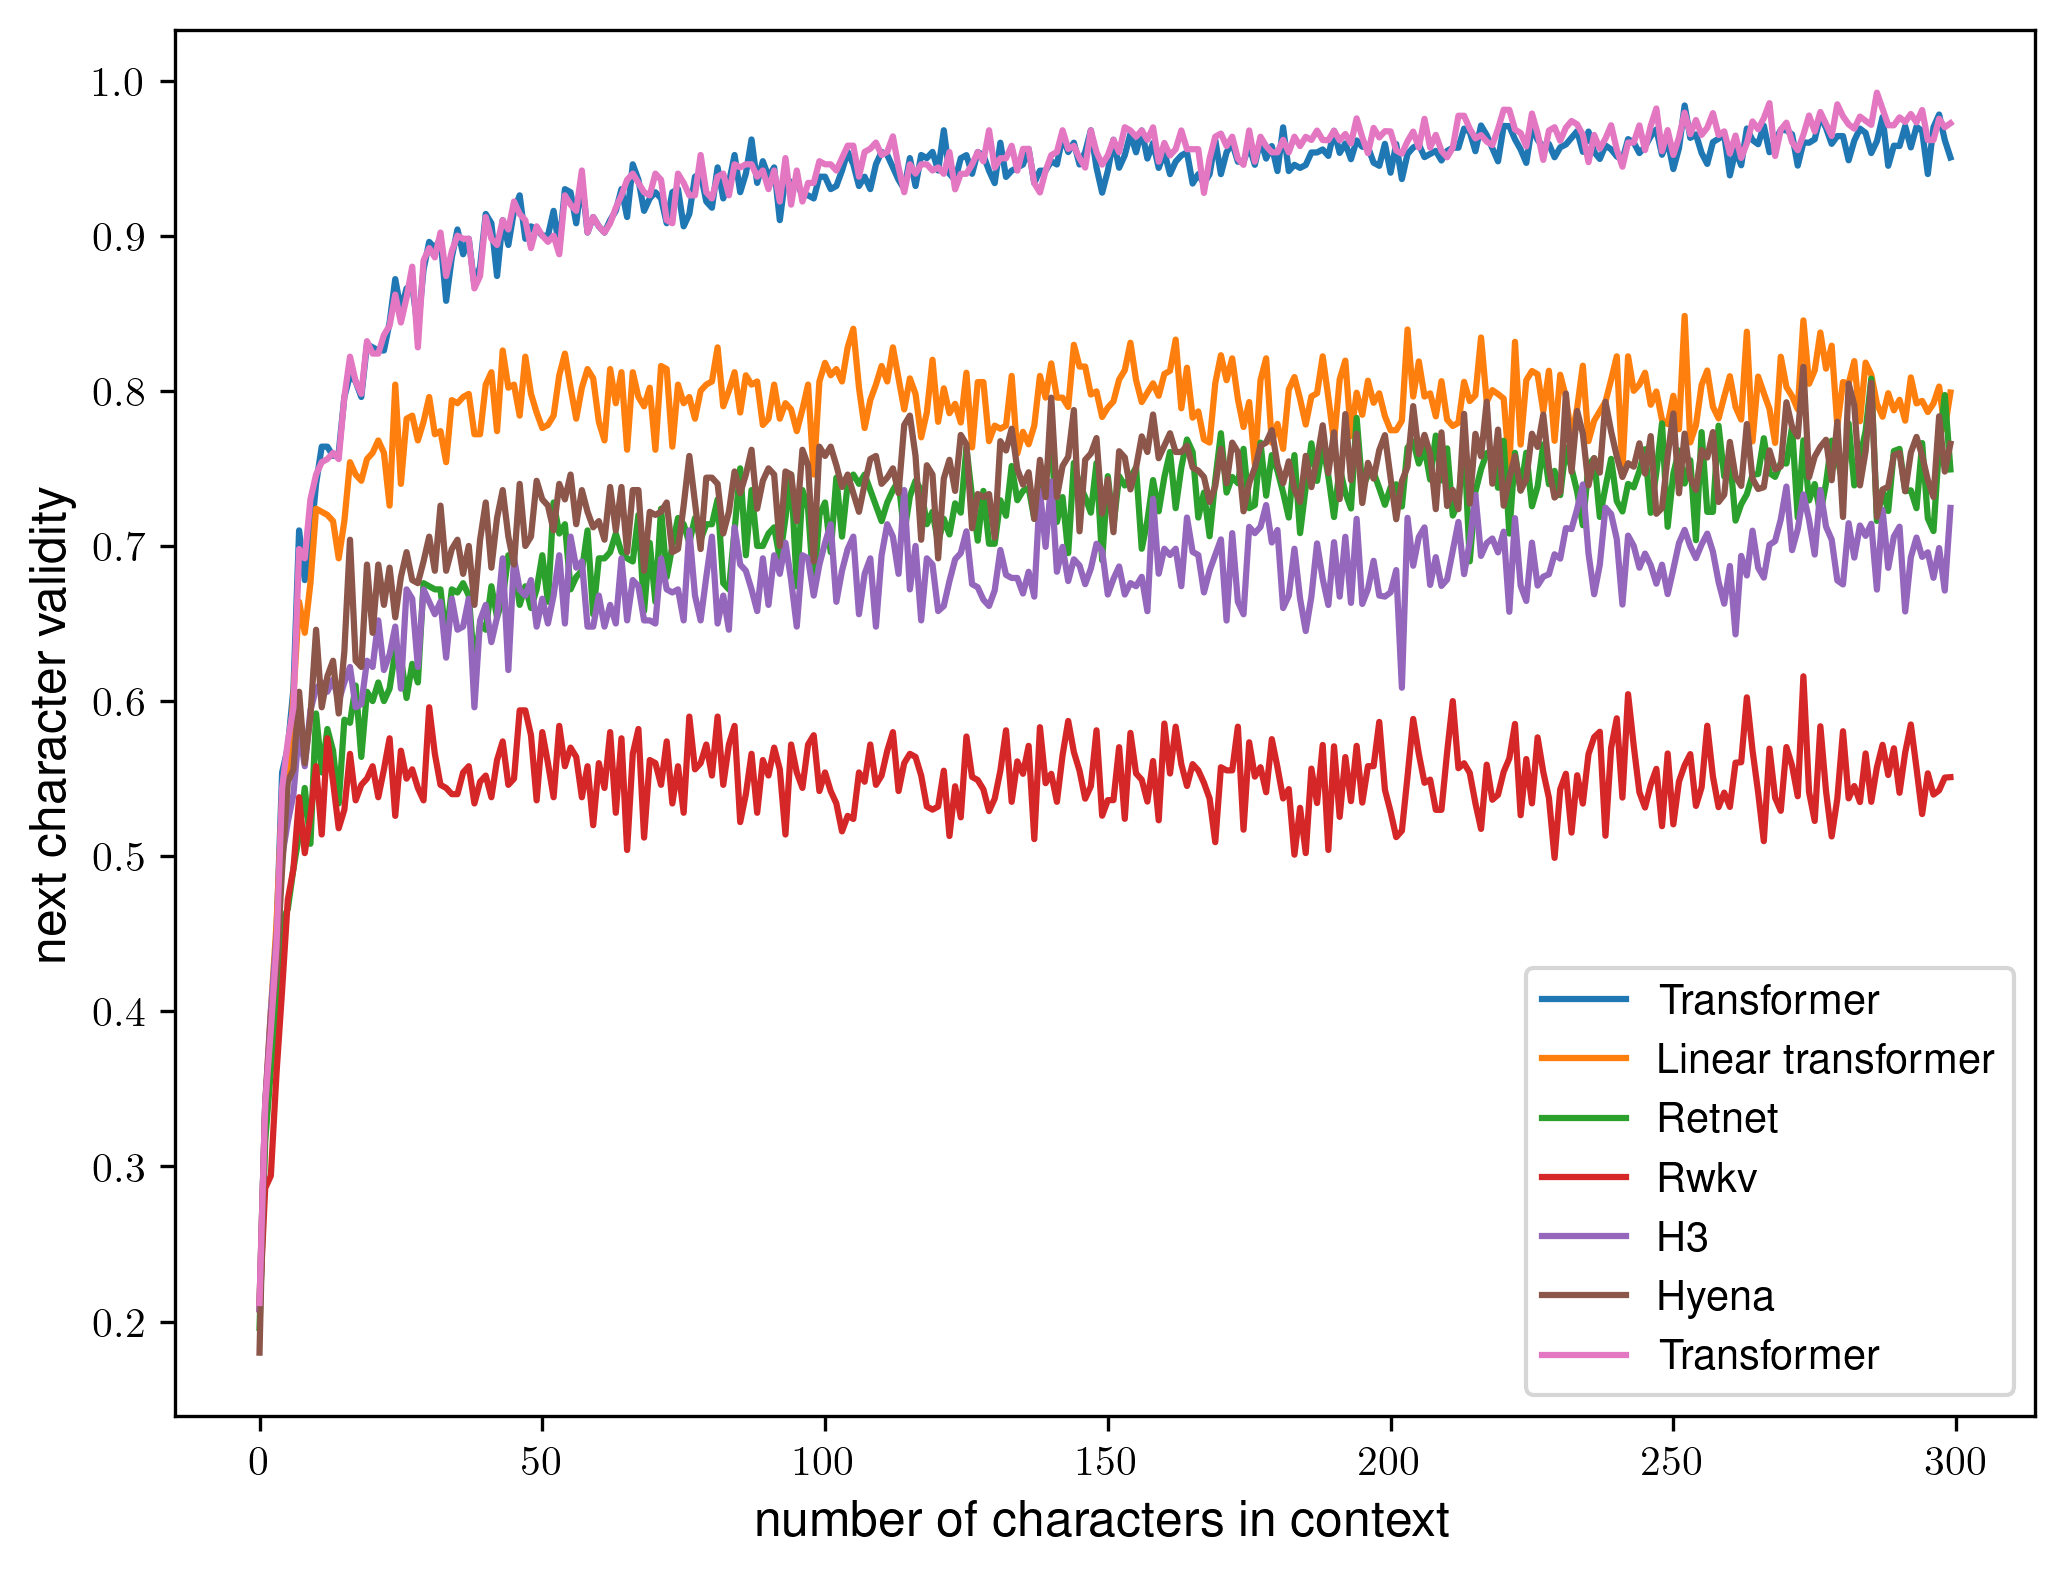

In [26]:
# plot learning curves
plt.figure(figsize=(8, 6))
# add xlabel
plt.xlabel("number of characters in context")
# set y label
plt.ylabel("next character validity")
# plt.title("In-context Accuracy")
for exp  in exp_folders.keys():
    try:
        in_context_learning_curve(exp_folders[exp], title=exp)
    except FileNotFoundError:
        print(f"skipping {exp}")

## n-gram vs model; model vs dfa; dfa vs n-gram

In [10]:
import torch
from analyze import get_dfa_probs as calculate_dfa_probs
from ngram import (
    predict_with_n_gram_back_off,
    prob_distance,
    prob_distance_dfa,
    prob_distance_dfa_ngram,
)

from batched_baum_welch import predict_with_baumwelch

import matplotlib.pyplot as plt
import numpy as np


class Vocab:
    def __init__(self, vocab: list):
        self.vocab = vocab
        # inverse vocab
        self.inv_vocab = {v: k for k, v in enumerate(vocab)}

    def get_vocab(self, id):
        return self.vocab[id]

    def get_id(self, char):
        return self.inv_vocab[char]

    def __len__(self):
        return len(self.vocab)

def get_ngram_probs(results, ngram=3):
    vocab = Vocab(results[0]["vocab"])
    n_gram_probs = []
    for b in range(len(results)):
        input = results[b]["input"]
        target = [vocab.get_id(t) for t in results[b]["target"]]
        probs = predict_with_n_gram_back_off(input, N=ngram, global_vocab=vocab)
        n_gram_probs.append(probs)
    return n_gram_probs

def get_baumwelch_probs(results):
    vocab = Vocab(results[0]["vocab"])
    baumwelch_probs = []
    for b in range(len(results)):
        input = results[b]["input"]
        probs = predict_with_baumwelch(input, vocab, max_states=12)
        baumwelch_probs.append(probs)
    return baumwelch_probs

def get_dfa_probs(results):
    vocab = Vocab(results[0]["vocab"])
    dfa_probs = []
    for b in range(len(results)):
        input = results[b]["input"]
        target = [vocab.get_id(t) for t in results[b]["target"]]
        probs = calculate_dfa_probs(input, results[b]["dfa"], vocab=vocab)
        dfa_probs.append(probs)
    return dfa_probs

def get_model_probs(results):
    model_probs = []
    for b in range(len(results)):
        probs = torch.softmax(torch.tensor(results[b]["probs"]), dim=-1).detach().cpu().numpy()
        model_probs.append(probs)
    return model_probs

In [11]:
import numpy as np
def get_greedy_dfa_accuracy(probs, dfa_probs):
    total = 0.0
    correct = 0.0
    for p1, pdfa in zip(probs, dfa_probs):
        indices = p1.argmax(axis=-1)[:len(pdfa)]
        correct += (pdfa[np.arange(len(pdfa)), indices] > 0).sum()
        total += len(pdfa)
    return correct / total

In [12]:
EPS=1e-7
def get_cross_entropy(probs, dfa_probs):
    total = 0.0
    cross_entropy = 0.0
    for p1, pdfa in zip(probs, dfa_probs):
        # calculate the soft cross-entropy between p1 and pdfa
        log_p1 = np.log(p1[:len(pdfa)] + EPS)
        log_pdfa = np.log(pdfa + EPS)
        cross_entropy += -((log_p1 - log_pdfa) * pdfa).sum()
        total += len(pdfa)
    return cross_entropy / total

In [13]:
def get_l1_loss(probs1, probs2, probsdfa):
    total = 0.0
    correct = 0.0
    for p1, p2, pdfa in zip(probs1, probs2, probsdfa):
        total += len(pdfa)
        correct += np.abs(p1[:len(pdfa)] - p2[:len(pdfa)]).sum()
    return correct / total

In [14]:
data1 = get_results(exp_folders["transformer/8"] + "/generations/200_test.txt")[:10]

In [32]:
probs = {}

In [33]:
probs["dfa"] = get_dfa_probs(data1)

In [34]:
probs["bw"]  = get_baumwelch_probs(data1)

100%|██████████| 352/352 [00:49<00:00,  7.09it/s]


In [35]:
get_greedy_dfa_accuracy(probs["bw"] , probs["dfa"])

0.9569272976680384

In [36]:
get_cross_entropy(probs["bw"] , probs["dfa"])

0.5880697784140512

In [37]:
probs["3gram"] = get_ngram_probs(data1, 3)
probs["2gram"] = get_ngram_probs(data1, 2)


In [38]:
get_greedy_dfa_accuracy(probs["3gram"] , probs["dfa"])

0.9478737997256516

In [39]:
for exp_name, folder in exp_folders.items():
    print(exp_name)
    try:
        data = get_results(folder + "/generations/200_test.txt")
        probs[exp_name] = get_model_probs(data)
    except:
        print(f"skipping {exp_name}")

transformer/8
transformer/2
transformer/4
transformer/1
linear_transformer/4
retnet/4
rwkv/2
h3/2
hyena/2
lstm/1
skipping lstm/1
transformer/12


In [40]:
accuracies = {}
for key1 in probs.keys():
    try:
        accuracies[key1] = get_greedy_dfa_accuracy(probs[key1], probs["dfa"])
    except:
        print(f"skipping {key1}")

In [41]:
ce_losses = {}
for key1 in probs.keys():
    try:
        ce_losses[key1] = get_cross_entropy(probs[key1], probs["dfa"])
    except Exception as e:
        print(e)
        print(f"skipping {key1}")

In [42]:
ce_losses

{'dfa': 0.0,
 'bw': 0.5880697784140512,
 '3gram': 0.5748155058048185,
 '2gram': 0.6970388128509056,
 'transformer/8': 0.3078560280773762,
 'transformer/2': 0.5143896391724652,
 'transformer/4': 0.31560360123329284,
 'transformer/1': 1.0621222203030352,
 'linear_transformer/4': 0.6269591790376219,
 'retnet/4': 1.1764135284272972,
 'rwkv/2': 1.216783947548382,
 'h3/2': 0.9594524277904048,
 'hyena/2': 0.8730447777878825,
 'transformer/12': 0.28566886077626613}

Text(0.5, 1.0, 'Average Cross Entropy (pmodel, pdfa)')

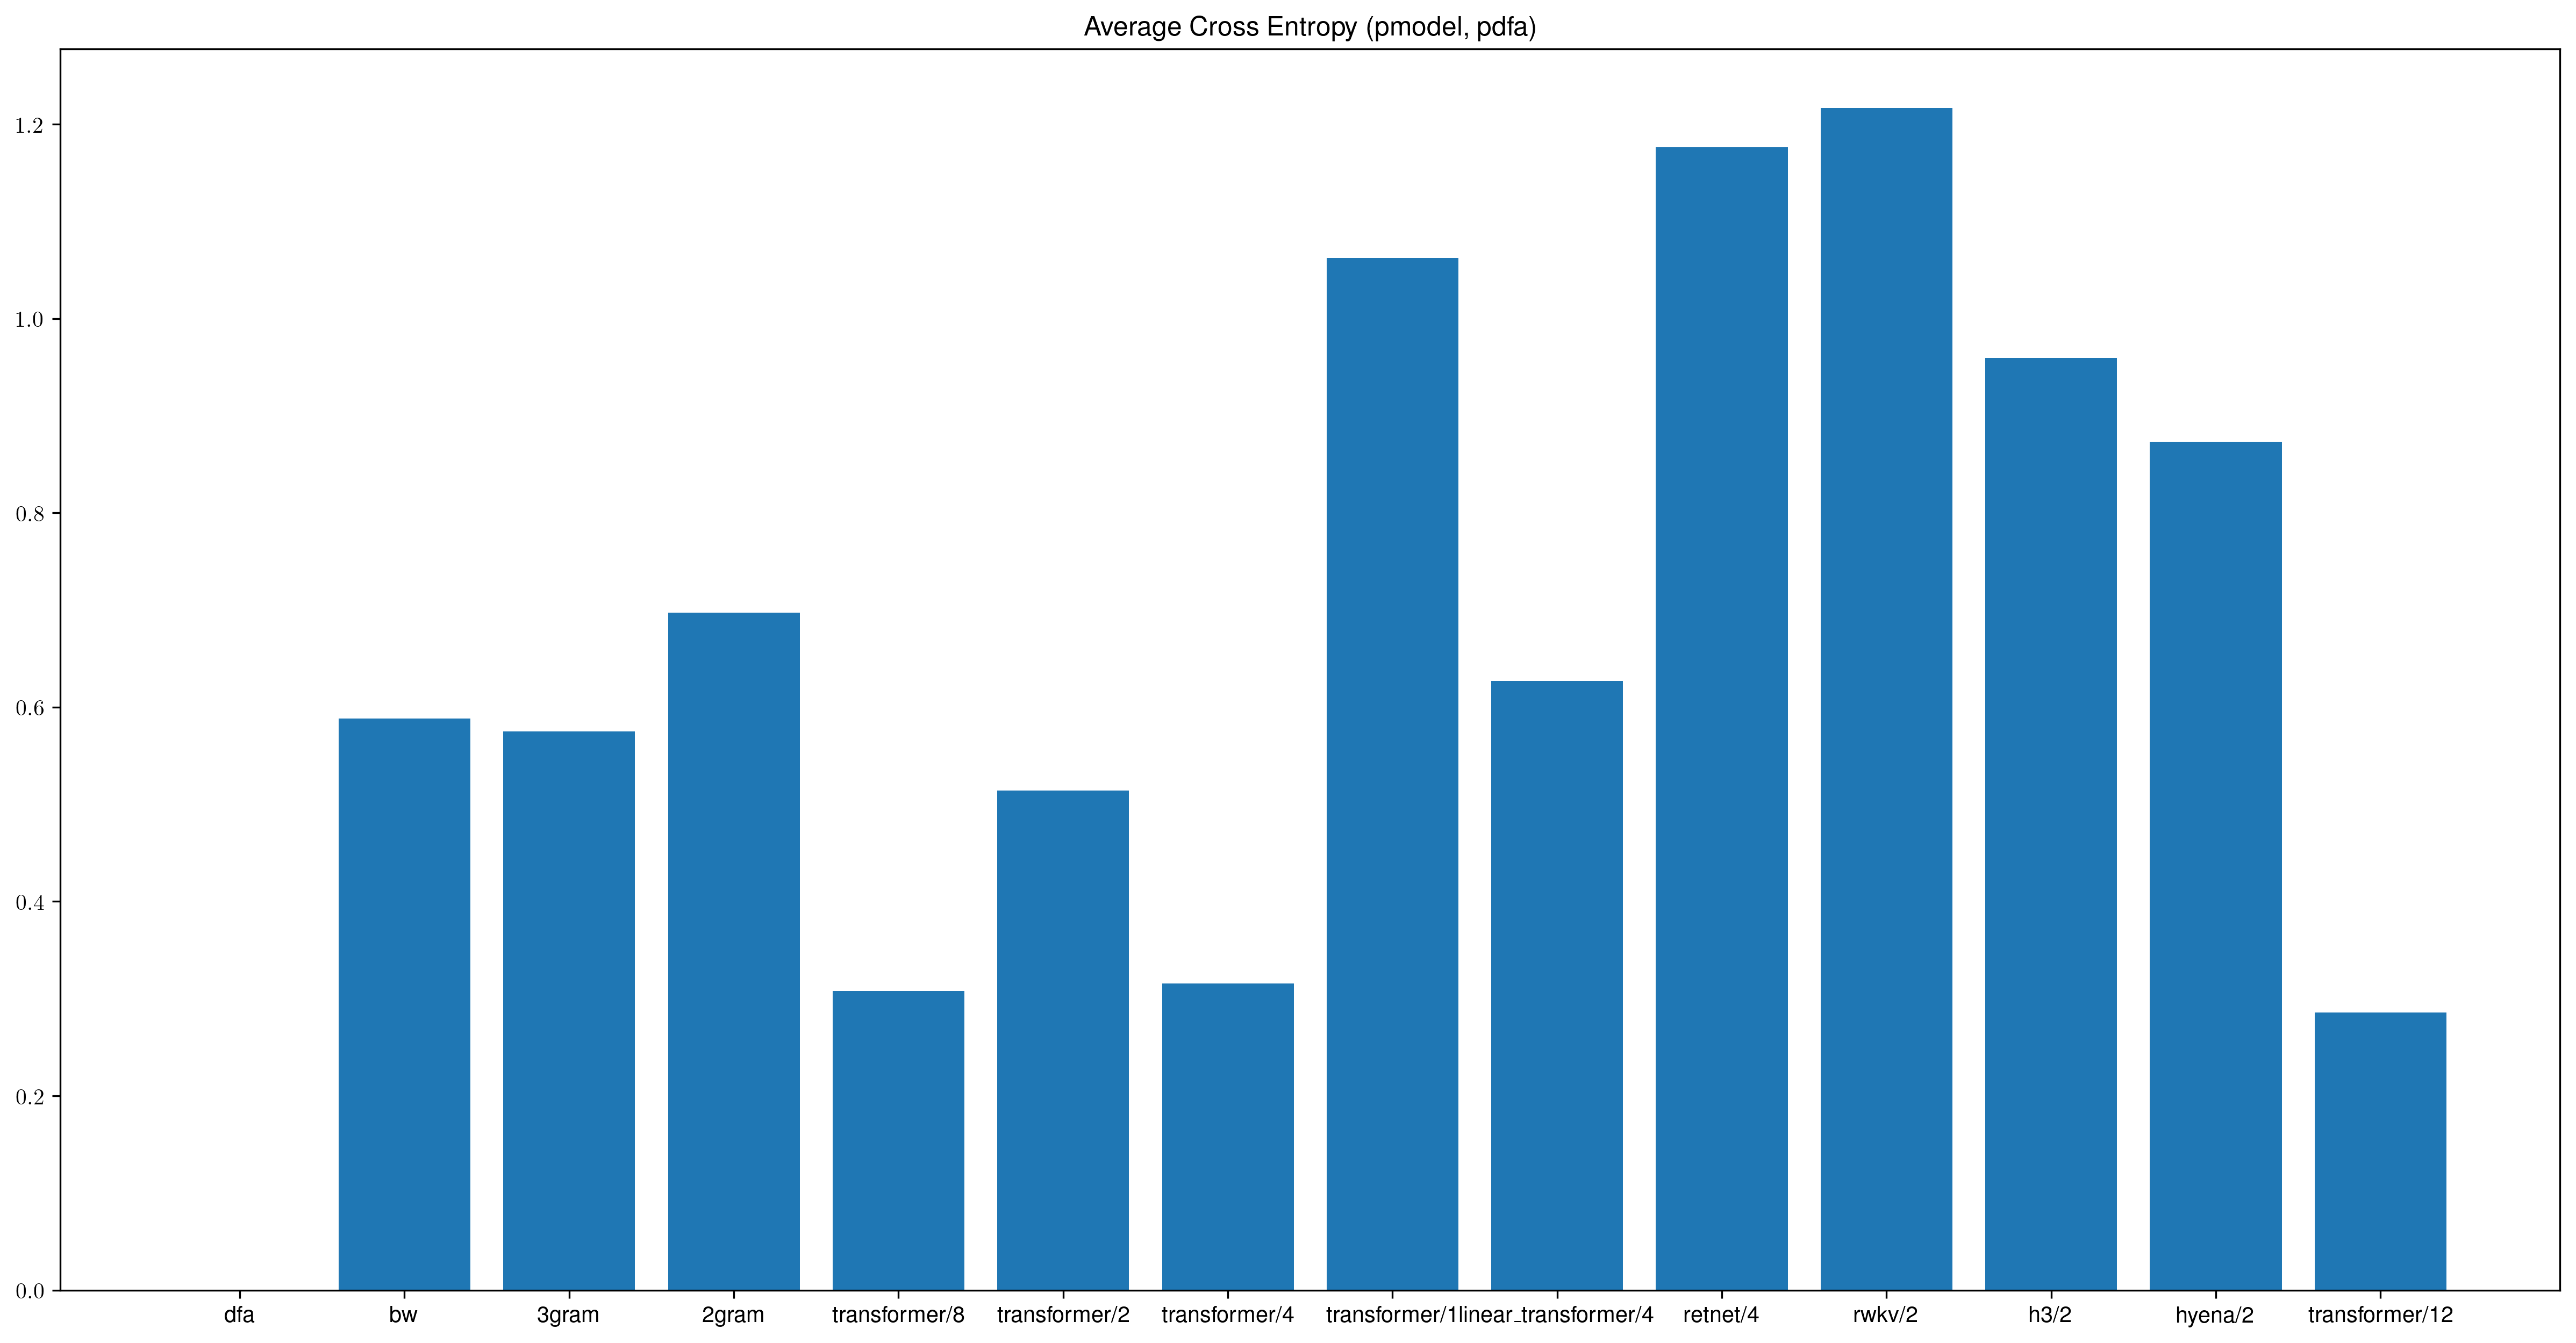

In [43]:
# plot bar chart of ce_losses with labels

plt.figure(figsize=(20, 10))
plt.bar(ce_losses.keys(), ce_losses.values())
plt.title("Average Cross Entropy (pmodel, pdfa)")

Text(0.5, 1.0, 'Average Validity Accuracy')

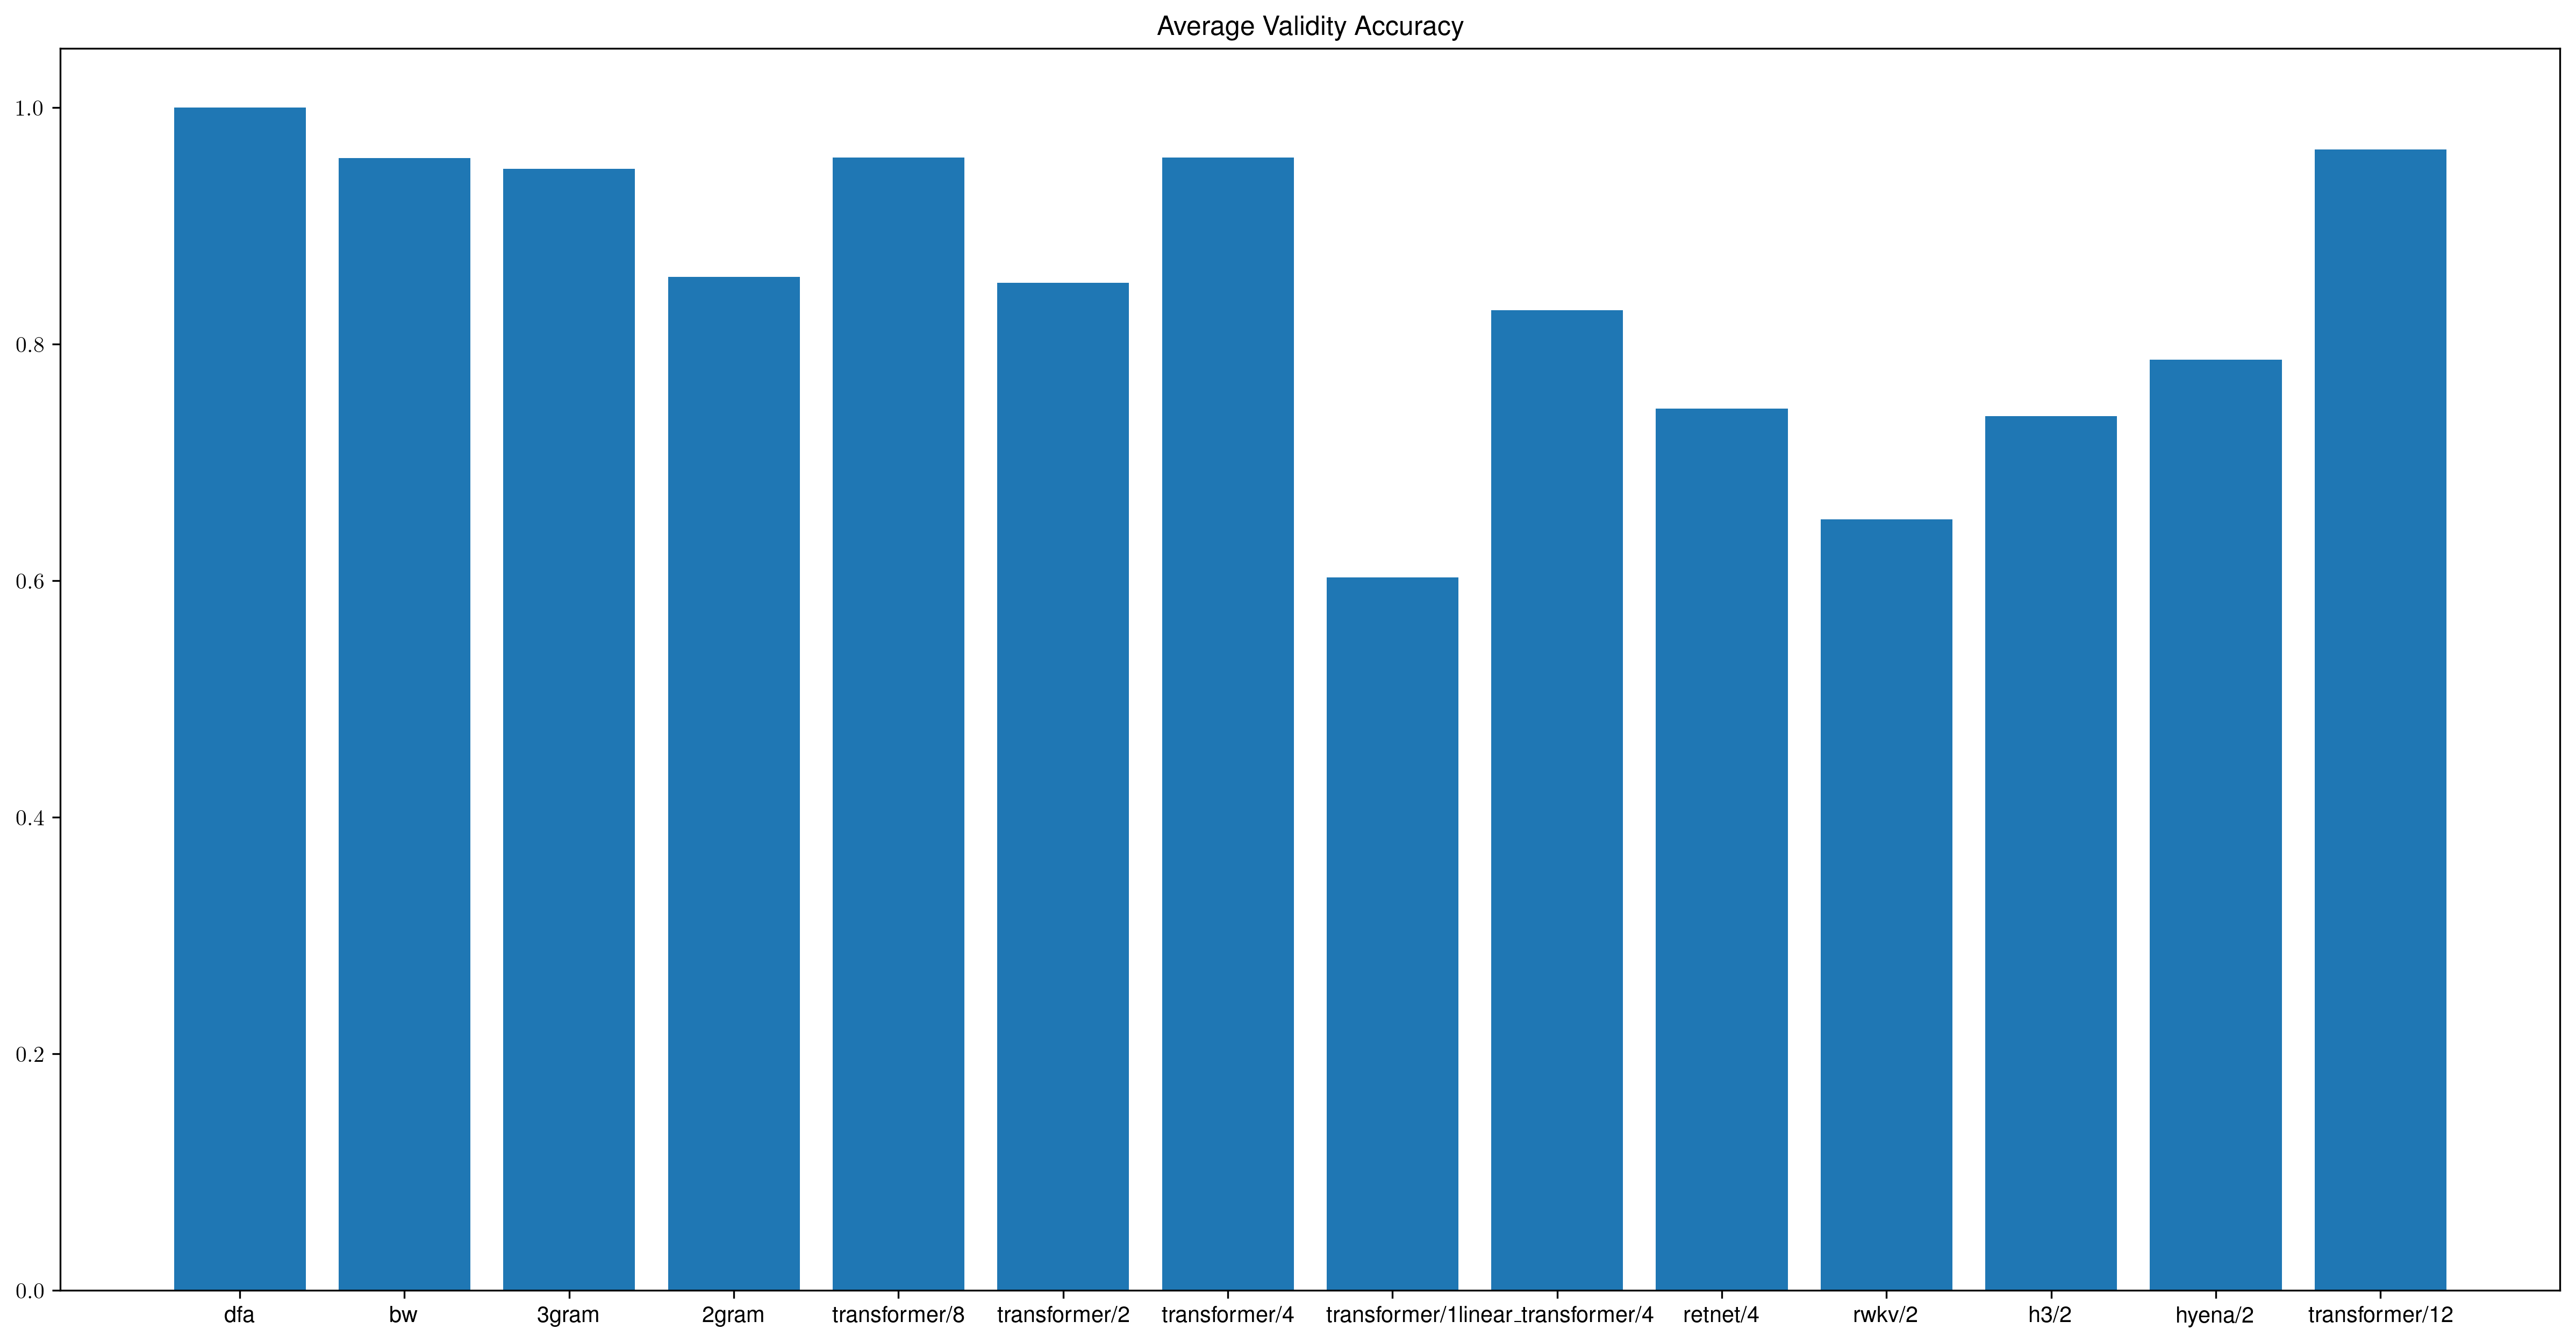

In [44]:
# similar bar chart for accuracy
plt.figure(figsize=(20, 10))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Average Validity Accuracy")



In [45]:
l1_losses = {}
for key1 in probs.keys():
    for key2 in probs.keys():
        if key1 == key2:
            continue
        try:
            l1_losses[(key1, key2)] = get_l1_loss(probs[key1], probs[key2], probs["dfa"])
        except Exception as e:
            print(f"skipping {key1}, {key2}")
            print(e)

In [46]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
def heatmap(l1_losses):
    # l1_losses is a dict of (key1, key2) -> l1_loss
    # we want to create a df where key1s are the index
    # and key2s are the columns
    key1s = sorted(list({key1 for key1, key2 in l1_losses.keys()}))
    key2s = sorted(list({key2 for key1, key2 in l1_losses.keys()}))
    df = pd.DataFrame(index=key1s, columns=key2s)
    for key1, key2 in l1_losses.keys():
        df.loc[key1, key2] = l1_losses[(key1, key2)]
    # replace nans with 0
    df = df.fillna(0)
    # heatmap
    print(df.head())
    sns.heatmap(df, annot=True)
    # add title
    plt.title("L1 Loss (pmodel1, pmodel2)")

          2gram     3gram        bw       dfa      h3/2   hyena/2  \
2gram  0.000000  0.313477  0.617053  0.603706  0.621483  0.573034   
3gram  0.313477  0.000000  0.458833  0.474985  0.715805  0.637745   
bw     0.617053  0.458833  0.000000  0.453873  0.922548  0.829693   
dfa    0.603706  0.474985  0.453873  0.000000  0.905842  0.837668   
h3/2   0.621483  0.715805  0.922548  0.905842  0.000000  0.643327   

       linear_transformer/4  retnet/4    rwkv/2  transformer/1  \
2gram              0.356467  0.729870  0.856620       0.763620   
3gram              0.510743  0.780535  0.895123       0.836500   
bw                 0.652059  0.839383  1.074532       1.059519   
dfa                0.648108  0.823573  1.086311       1.093701   
h3/2               0.682840  0.948039  0.824550       0.754631   

       transformer/12  transformer/2  transformer/4  transformer/8  
2gram        0.504908       0.276717       0.450903       0.489318  
3gram        0.362941       0.460150       0.30127

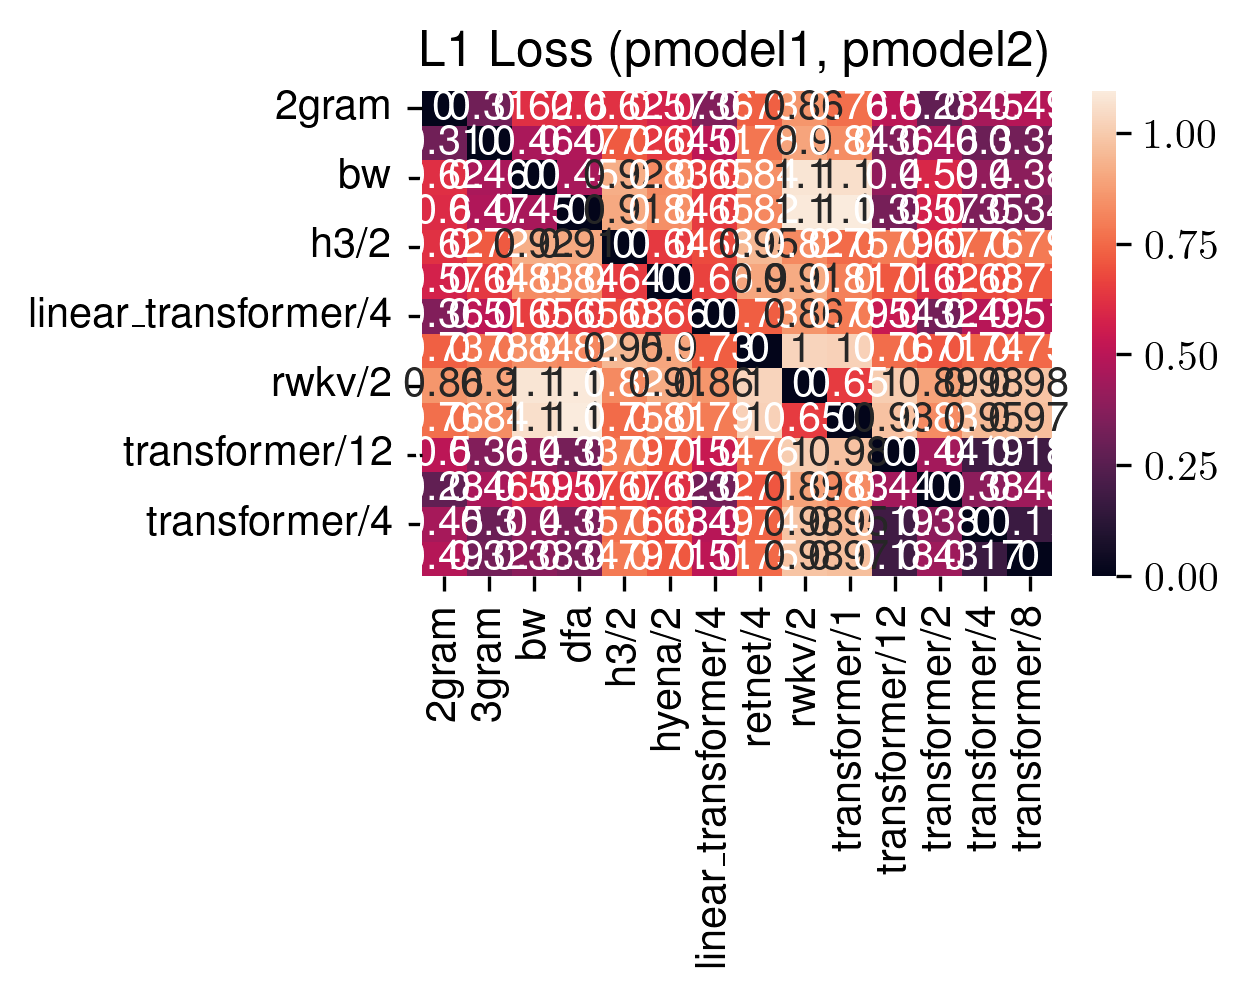

In [48]:
heatmap(l1_losses);

In [49]:

def get_ngram_probs(folder, ngram=3):
    results = get_results(os.path.join(folder, "generations", "200_test.txt"))
    vocab = Vocab(results[0]["vocab"])
    for b in range(len(results)):
        input = results[b]["input"]
        target = [vocab.get_id(t) for t in results[b]["target"]]
        model_probs = torch.softmax(torch.tensor(results[b]["probs"]), dim=-1).detach().cpu().numpy()
        dfa_probs = get_dfa_probs(input, results[b]["dfa"], vocab=vocab)
        model_probs = model_probs[:len(dfa_probs)]
        total_l1_model_dfa += abs(model_probs - dfa_probs).sum()
        total_l1_chars += dfa_probs.shape[0]
        if ngram != -1:
            n_gram_probs = predict_with_n_gram_back_off(input, N=ngram, global_vocab=vocab)
            total_l1_model_ngram += abs(model_probs - n_gram_probs).sum()
            total_l1_dfa_ngram += abs(dfa_probs - n_gram_probs).sum()

            for t in range(len(target)):
                if target[t] == -100:
                    if t + 1 < len(target):
                        if target[t + 1] == -100:
                            break
                        else:
                            continue
                    else:
                        break
                else:
                    total_n_gram_loss -= np.log(n_gram_probs[t][target[t]] + 1e-5)
                    total_n_gram_chars += 1
                    if dfa_probs[t, n_gram_probs[t].argmax()] != 0.0:
                        total_n_gram_corrects += 1

    return (
            total_l1_model_ngram / total_l1_chars,
            total_l1_model_dfa / total_l1_chars,
            total_l1_dfa_ngram / total_l1_chars,
            total_n_gram_loss / total_n_gram_chars,
            total_n_gram_corrects / total_n_gram_chars,

        )

In [50]:
tf_ngram_results = get_ngrams(exp_folders["TF"])

NameError: name 'get_ngrams' is not defined

In [ ]:
tf_ngram_results

In [ ]:
tf_ngram_results = get_ngrams(exp_folders["TF"], ngram=2)

In [ ]:
tf_ngram_results

In [ ]:
tf_ngram_results = get_ngrams(exp_folders["TF"], ngram=4)

## L1 Table

## Clustering plots of each model

In [15]:
from sklearn.manifold import TSNE
# import PCA
from sklearn.decomposition import PCA
import numpy as np
from make_video import prepare_video

In [16]:
fill_types = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

In [17]:
import matplotlib.cm as cm
colors = cm.viridis(np.linspace(0, 1, 12))

In [18]:
colors = cm.Set1.colors +  ((0.0, 0.0, 0.0), cm.Set2.colors[0], cm.tab20b.colors[-1], cm.tab20b.colors[-2], cm.tab20b.colors[-3])

In [19]:
len(colors)

14

In [20]:
cm.tab20b.colors[-1]

(0.8705882352941177, 0.6196078431372549, 0.8392156862745098)

In [22]:
def plot_clusters(folder, reduction="tsne", layer_wise=False):
    results = get_results(os.path.join(folder, "generations", "200_test.txt"))
    os.makedirs(os.path.join(folder, "plots"), exist_ok=True)
    for i in range(1, 2):
        example = results[i]
        t_hidden = len(example["hidden_outputs"][0])
        t_states = len(example["states"])
        n_layers = len(example["hidden_outputs"])

        reducer = TSNE if reduction == "tsne" else PCA

        if layer_wise:
            Xs = [reducer(n_components=2).fit_transform(hidden_outputs) for hidden_outputs in example["hidden_outputs"]]
            X = np.concatenate(Xs, axis=0)
            X = X.reshape(n_layers, t_hidden, 2)
        else:
            hidden_outputs = np.concatenate(example["hidden_outputs"], axis=0)
            X = reducer(n_components=2).fit_transform(hidden_outputs)
            X = X.reshape(n_layers, t_hidden, 2)

        X = X[:, :t_states, :]

        for t in range(20, 500, 10):
            axes, fig = plt.subplots(3, 3, figsize=(16, 16))
            # assert n_layers == 13
            axes.suptitle(f"T={t}, #states: "
                    + str(len(example["dfa"].dfa._transition_function))
                    + ", len(vocab): "
                    + str(len(example["dfa"].dfa.alphabet)))

            for layer in range(n_layers-1, -1, -1):
                X_layer = X[layer, :t]
                labels = np.array(example["states"][:t])
                chars = np.array(list(example["input"][:t]))
                vocab = example["vocab"][1:]

                ax = fig[layer // 3, layer % 3]
                for label in np.unique(labels):
                    if label == -1 or label == "-1":
                        continue
                    for ci, v in enumerate(example["dfa"].dfa.alphabet):
                        indices = np.where((labels == label) & (chars == v))
                        if len(indices) > 0:
                            ax.scatter(X_layer[indices, 0], X_layer[indices, 1], marker=fill_types[ci], c=colors[label])
                            # show legend
                # set title
                ax.set_title(
                    f"layer={layer}"
                )
            plt.savefig(os.path.join(folder, "plots/", f"e_{i}_{reduction}_out_label_t_{t}.png"))
            plt.close()

        video_out_folder = os.path.join(folder, f"res_lw_{layer_wise}_videos", f"{reduction}_e_{i}_time")
        video_glob = os.path.join(folder, "plots/") + "/" + f"e_{i}_{reduction}_out_label_t_*.png"
        prepare_video(video_glob, video_out_folder)
        print(f"done at {video_out_folder}")


In [ ]:
plot_clusters(exp_folders["transformer/4"], reduction="tsne", layer_wise=False)

In [23]:
plot_clusters(exp_folders["linear_transformer/8"], reduction="tsne", layer_wise=True)

ffmpeg version 4.2.7-0ubuntu0.1+esm3 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.2)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1+esm3 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-lib

done at outputs/2023-11-14/10-27-23-673379/res_lw_True_videos/tsne_e_1_time


frame=   48 fps=0.0 q=-1.0 Lsize=     423kB time=00:00:22.50 bitrate= 154.0kbits/s speed=25.6x    
video:422kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.329122%
[libx264 @ 0x55f64f0dd980] frame I:1     Avg QP: 4.07  size: 46785
[libx264 @ 0x55f64f0dd980] frame P:14    Avg QP:13.80  size: 17441
[libx264 @ 0x55f64f0dd980] frame B:33    Avg QP:17.52  size:  4245
[libx264 @ 0x55f64f0dd980] consecutive B-frames:  8.3%  0.0%  0.0% 91.7%
[libx264 @ 0x55f64f0dd980] mb I  I16..4: 86.3%  4.4%  9.3%
[libx264 @ 0x55f64f0dd980] mb P  I16..4:  0.7%  0.2%  1.0%  P16..4:  3.0%  0.9%  0.9%  0.0%  0.0%    skip:93.3%
[libx264 @ 0x55f64f0dd980] mb B  I16..4:  0.0%  0.0%  0.2%  B16..8:  4.1%  0.6%  0.3%  direct: 0.1%  skip:94.6%  L0:46.6% L1:52.2% BI: 1.2%
[libx264 @ 0x55f64f0dd980] 8x8 transform intra:6.6% inter:8.6%
[libx264 @ 0x55f64f0dd980] coded y,uvDC,uvAC intra: 12.2% 13.8% 13.7% inter: 0.5% 1.3% 1.3%
[libx264 @ 0x55f64f0dd980] i16 v,h,dc,p: 90%  9%  1%  0%
[libx

In [ ]:
plot_clusters(exp_folders["transformer/4"], reduction="pca", layer_wise=False)

In [ ]:
plot_clusters(exp_folders["transformer/4"], reduction="pca", layer_wise=True)